
# Histogram Equalization


This examples enhances an image with low contrast, using a method called
*histogram equalization*, which "spreads out the most frequent intensity
values" in an image [1]_. The equalized image has a roughly linear cumulative
distribution function.

While histogram equalization has the advantage that it requires no parameters,
it sometimes yields unnatural looking images.  An alternative method is
*contrast stretching*, where the image is rescaled to include all intensities
that fall within the 2nd and 98th percentiles [2]_.

.. [1] http://en.wikipedia.org/wiki/Histogram_equalization
.. [2] http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm




/home/hh/anaconda3/envs/geo/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "
/home/hh/anaconda3/envs/geo/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


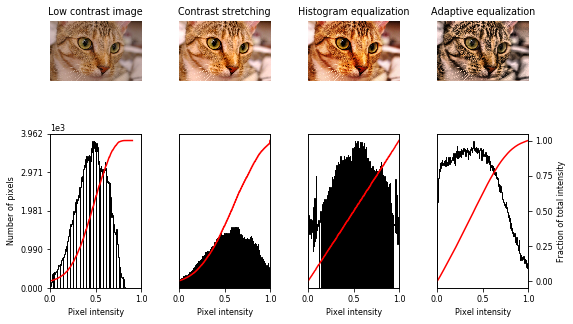

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()
img = data.chelsea()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [6]:
whos

Variable            Type           Data/Info
--------------------------------------------
ax_cdf              AxesSubplot    AxesSubplot(0.761426,0.104556;0.158036x0.428579)
ax_hist             AxesSubplot    AxesSubplot(0.761426,0.104556;0.158036x0.428579)
ax_img              AxesSubplot    AxesSubplot(0.761426,0.677612;0.158036x0.168198)
axes                ndarray        2x4: 8 elems, type `object`, 64 bytes
data                module         <module 'skimage.data' fr<...>kimage/data/__init__.py'>
exposure            module         <module 'skimage.exposure<...>ge/exposure/__init__.py'>
fig                 Figure         Figure(576x360)
i                   int            3
img                 ndarray        300x451x3: 405900 elems, type `uint8`, 405900 bytes (396.38671875 kb)
img_adapteq         ndarray        300x451x3: 405900 elems, type `float64`, 3247200 bytes (3.096771240234375 Mb)
img_as_float        function       <function img_as_float64 at 0x7fcbcbc72d08>
img_eq            